In [1]:
__author__ = 'Derek Qi'
# Doing portfolio backtest and generates output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from time import time
import pickle
import os
import sklearn.preprocessing as pp

from setup.univ_setup import *
from factor_mining.combine_factors import *
from factor_mining.factor_model_regression import *
from factor_mining.factor_preprocessing import *

from factor_model.stock_ret_est import GenReturn 
from GenPosition import *
from backtest_main import *
from performance_analysis.pa_core import *

from factor_mining.factors.momentum import *

from factor_mining.Mark0 import * # This is alpha file

In [2]:
### universe setup ###
print('Setup R3000 universe')
datadir = '/home/derek-qi/Documents/R3000_Data/data/r3000/'
start = time()
if os.path.exists(datadir + 'univ.pkl'):
    print('use existing binary file')
    with open(datadir + 'univ.pkl', 'rb') as univ_fh:
        univ = pickle.load(univ_fh)
    
else:
    print('construct from csv')
    big_table_dir = datadir + 'big_table_full_v3.csv'
    univ = univ_setup(big_table_dir)
    filt_by_name(univ) # This is fucking slow！
    with open(datadir + 'univ.pkl','wb') as fh:
        pickle.dump(univ, fh)
end = time()
print('%f seconds' % (end - start))

Setup R3000 universe
use existing binary file
0.430900 seconds


In [3]:
### model configuration ###
print('Calculate factors')
# define and calculate all factors
factors = alpha_four_factors(univ)
# concat into factor exposure matrices
factor_exp_mat = combine_factors(factors)
# Preprocessing factor expsure matrices
print('Scale each factor')
factor_exp_mat = process_batch(factor_exp_mat, pp.scale)
print('Winsorize with +/- 3 std')
factor_exp_mat = process_batch(factor_exp_mat, winsorize_std)
print('Done')

Calculate factors
Scale each factor


/home/derek-qi/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Winsorize with +/- 3 std
Done


In [4]:
# const setup
factor_names = [k for k in factors.keys()]
N_f = len(factor_names)
datelst = sorted(factor_exp_mat.keys())
N_T = len(datelst)

In [5]:
# Run backtest
# Calc stock returns
rebal = 4
ret_series = log_return(univ, -rebal)

In [6]:
dstart = datetime(2015, 1, 1)
dend = datetime(2015, 12, 31)
print('Start backtest from %s to %s' % (dstart.strftime('%Y/%m/%d'), dend.strftime('%Y/%m/%d')))
ts = time()
# ptfl_fin, pnl = backtest_batch(univ, factor_exp_mat, ret_series, dstart, dend, silent=False)
ptfl_fin, pnl, fr_lst = backtest_multi_period_rebalance(univ, factor_exp_mat, ret_series, dstart, dend, rebal, silent=False)
te = time()
print(te - ts)

Start backtest from 2015/01/01 to 2015/12/31
2015-01-02 00:00:00
Pool size: 559
        ticker  weight   log_ret
0    X1288453D     0.2  0.078904
285       KITE     0.2  0.266759
395        RAX     0.2 -0.005512
493       ULTA     0.2  0.036613
546       ZLTQ     0.2  0.086233
Period log pnl: 0.092599
2015-01-09 00:00:00
Pool size: 790
        ticker  weight   log_ret
0    X1288453D     0.2  0.015683
276       KITE     0.2  0.043517
382        RAX     0.2 -0.022574
472       ULTA     0.2 -0.014161
525       ZLTQ     0.2  0.023379
Period log pnl: 0.009169
2015-01-16 00:00:00
Pool size: 771
        ticker  weight   log_ret
0    X1288453D     0.2  0.003526
269       KITE     0.2 -0.204536
372        RAX     0.2  0.037136
458       ULTA     0.2  0.042412
507       ZLTQ     0.2  0.007341
Period log pnl: -0.022824
2015-01-23 00:00:00
Pool size: 679
        ticker  weight   log_ret
0    X1288453D     0.2 -0.019979
252       KITE     0.2 -0.003271
350        RAX     0.2 -0.059787
434       ULT

CAGR:0.162081 
Volatility:0.315312
Periodical_Sharpe_ratio:0.476392
Max drawdown: 0.048812
Drawdown length: 0



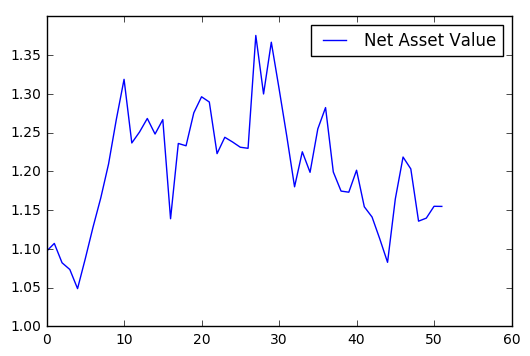

In [7]:
# simple_pa(pnl)
pmfc = (cagr(pnl), vol(pnl), sharpe_ratio(pnl), max_drawdown(pnl), drawdown_length(pnl))
print('CAGR:%f \nVolatility:%f\nPeriodical_Sharpe_ratio:%f\nMax drawdown: %f\nDrawdown length: %d\n' % pmfc)

nowstr = datetime.now().strftime('%Y%m%d_%H:%M:%S')
pnl['cumpnl'] = np.cumsum(pnl['pnl'])
plot_nav(pnl)

# pnl.to_csv('./output/pnl_series_' + nowstr + '.csv', index=False)
# plot_nav(pnl, savedir = './output/')

In [8]:
fr_lst

market_cap    0.000147
momentum      0.007935
beta         -0.013339
vol10        -0.019747
market_cap    0.000480
momentum      0.007077
beta         -0.011043
vol10        -0.019250
market_cap    0.000085
momentum      0.008232
beta         -0.012397
vol10        -0.020831
market_cap   -0.000312
momentum      0.007843
beta         -0.012087
vol10        -0.020643
market_cap    0.000047
momentum      0.006912
beta         -0.011481
vol10        -0.020400
market_cap    0.000100
momentum      0.007923
beta         -0.012137
vol10        -0.021125
market_cap    0.000636
momentum      0.008068
beta         -0.014436
vol10        -0.023443
market_cap    0.001441
momentum      0.008876
beta         -0.019971
vol10        -0.026187
market_cap    0.001142
momentum      0.008904
beta         -0.020594
vol10        -0.027021
market_cap    0.001466
momentum      0.008921
beta         -0.018123
vol10        -0.028039
market_cap    0.001958
momentum      0.008556
beta         -0.014095
vol10      